# Laboratorium 5
Piotr Kuchta, Sebastian Soczawa



Zadanie 1:
Aproksymacja średniokwadratowa punktowa populacji Stanów Zjednoczonych w przedziale [1900,1980] wielomianami stopnia m dla 0 ≤ m ≤ 6.

Na początku importujemy potrzebne biblioteki

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Implementujemy funkcję odpowiedzialna za tworzenie macierzy jednomianów.

In [2]:
def polynomial_matrix(x_values,pow):
    m = len(x_values)
    n = pow + 1
    matrix = np.empty(shape=(m,n))
    for i in range(m):
        for j in range(n):
            matrix[i][j] = x_values[i]**j
    return matrix

Implementujemy funkcje pomocnicze obliczające wartość wielomianu, oraz błąd

In [3]:


def horner(x,c):
    result = 0 
    for i in range(len(c)-1,-1,-1):
        result = (result*x) + c[i]
    return result

def sqdiff(real,calculated):
    sum = 0
    for yr,yc in zip(real,calculated):
        sum += (yr-yc)**2
    return sum

Definiujemy podstawowe dane i zmienne niezbędne do obliczeń.

In [4]:
real = 248709873
years = np.array([1900,1910,1920,1930,1940,1950,1960,1970,1980])
pop = [76212168,92228496,106021537,123202624,132164569,151325798,179323175,203302031,226542199]
n = len(years)
m = 7
coeff = []
x_space = np.arange(1900, 1990, 0.1)
AICcs = np.empty(shape=m)
errors = np.empty(shape=m)
color = ["red","black","yellow","aqua","indigo","blue","green"]

W pętli tworzymy macierz jednomianów, a następnie obliczamy współczynniki wielomianów aproksymujących. Na końcu obliczamy wartości tych wielomianów w odpowiednich punktach, kryterium informacyjne Akaikego oraz błąd względny dla każdego wielomianu. Rysujemy wielomiany na jednym wykresie

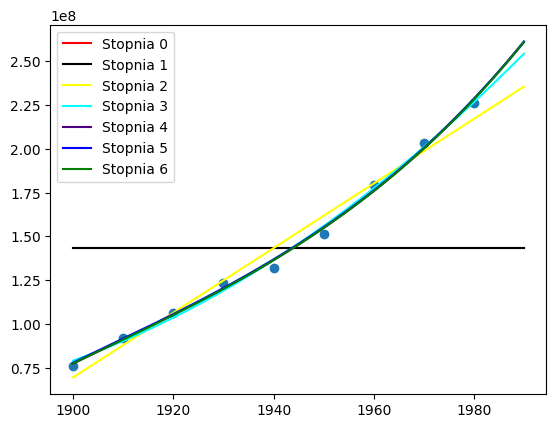

In [5]:

for i in range(0,m):
    k = i+1
    p_matrix = polynomial_matrix(years,i)
    coeff.append(np.linalg.lstsq(p_matrix,pop,rcond=-1)[0])
    y_vals = [horner(x,coeff[i-1]) for x in years]
    y_space = [horner(x,coeff[i-1]) for x in x_space]
    AICcs[i] = 2*k+n*np.log(sqdiff(pop,y_vals)/n)+2*k*(k+1)/(n-k-1)
    errors[i] = abs(real-horner(1990,coeff[i-1]))/real
    plt.plot(x_space,y_space,label="Stopnia "+str(i),color=color[i])
plt.scatter(years,pop)
plt.legend()

    
   

Wypisujemy wartości kryterium informacyjngeo Akaikego oraz wartości błędów względnych.

In [6]:
print("Kryterium informacyjne Akaikego: ",AICcs)
print("Błędy: ",errors)

Kryterium informacyjne Akaikego:  [321.01097505 324.43954648 293.85647812 286.6533739  296.8804017
 321.14100467 392.99271593]
Błędy:  [0.42354851 0.42354851 0.05187476 0.02413685 0.05118131 0.05252973
 0.05127757]


## Wnioski
Jak możemy zauważyć najmniejsza wartość kryterium Akaiekego występuje dla wielomianu o stopniu 2. Ten wielomian ma również najmniejszy błąd względny. Wynika z tego, że wyższy stopień wielomianu niekoniecznie sprawia że wyniki są dokładniejsze

# Zadanie 2

Wykonaj aproksymację średniokwadratową ciągłą funkcji f(x) =√x w przedziale [0,2] wielomianem drugiego stopnia, używając wielomianówCzebyszewa.

Do importów z zadania pierwszego dołączamy funkcję liczącą całki oraz bibliotekę mpmath

In [7]:
import scipy.integrate as integrate
import mpmath as mp

Definiujemy funkcję, którą będziemy aproksymować

In [8]:
def f(x):
    return mp.sqrt(x)

Do liczenia współczynników wielomianu Czebyszewa posłużymy się poniższą funkcją wagową:

In [9]:
def w(t):
    return 1/(mp.sqrt(1-(t**2)))

Korzystając z wzoru: $$ x = \frac{b-a}{2} \cdot t + \frac{a + b}{2} $$

definiujemy funkcję, która transformuje argumenty na na przedział [-1, 1]

In [10]:
def transform_range(x):
    return x-1

Korzystając z wykładu definiujemy 3 funkcje bazowe - wielomiany Czebyszewa

In [11]:
base_functions = [lambda x: 1, lambda x: transform_range(x), lambda x: 2*transform_range(x)**2 -1]

Korzystając ze wzoru: $$ c_k = \frac{\langle f, \phi _k \rangle}{\langle \phi _k, \phi _k \rangle}$$

Obliczamy kolejne współczynniki wielomianu

In [12]:
c = np.zeros(3)

for i in range(3):
    c[i] = integrate.quad(lambda x: w(transform_range(x))*(lambda x : f(x)*base_functions[i](x))(x), 0, 2)[0]\
        /integrate.quad(lambda x: w(transform_range(x))*(lambda x : base_functions[i](x)*base_functions[i](x))(x), 0, 2)[0]
    print("c[", i, "] = ", c[i], sep="")

c[0] = 0.9003163161571979
c[1] = 0.6002108774379749
c[2] = -0.12004217548755203


Poniższa funkcja służy do obliczania wartości wielomianu, gdy znamy już jego współczynniki i funkcje bazowe 
$$ p =\sum_{k=0}^{n}c_k \phi _k $$

In [13]:
def polynomial_value(x, c):
    sol = 0.0
    for i in range(2, -1, -1):
        sol += c[i]*base_functions[i](x)
    return sol

Na koniec liczymy wartości wielomianu odstępach co 0.01 i rysujemy wykres, porównując z funkcją właściwą

<function matplotlib.pyplot.show(close=None, block=None)>

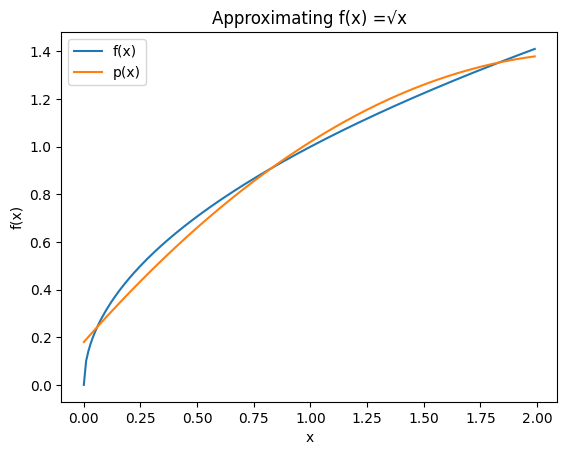

In [14]:
x_space = np.arange(0, 2, 0.01)
y_space = [polynomial_value(x, c) for x in x_space]
y_real = [f(x) for x in x_space]
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(label="Approximating f(x) =√x")
plt.plot(x_space, y_real, label="f(x)")
plt.plot(x_space, y_space, label="p(x)")
plt.legend()
plt.show

## Wnioski

Wyniki aproksymacji w podanym przedziale są akceptowalne, jednak nie jest ona tak dokładna jak niektóre metody interpolacji. Korzystając z tego, że wielomiany czebyszewa są ortogonalne uniknęliśmy rozwiązywania długiego równania macierzowego, dodatkowo unikając błędów związanych ze złym uwarunkowaniem macierzy.

# Bibliografia
1. Wykład
2. Materiały do zajęć
3. https://en.wikipedia.org/wiki/Chebyshev_polynomials